In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [2]:
# Import models and utility functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import roc_auc_score, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [3]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv',header=0)
df.head(n=10)
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [4]:
null_values = df.isnull().sum()

# Display the result
print(null_values)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [6]:
# Remove 'nameOrig' and 'nameDest' columns from the dataset
df = df.drop(columns=['nameOrig', 'nameDest'])

# Check the new dataset after removing the columns
print(df.head())
df

   step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  
0             0.0        0               0  
1             0.0        0               0  
2             0.0        1               0  
3             0.0        1               0  
4             0.0        0               0  


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,479803.00,347245.65,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,90545.00,80627.64,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,20545.00,6404.95,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,90605.00,80584.95,0.00,0.00,0,0


<ipython-input-7-ae2b2f67383e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='step', data=df, palette='Set2')


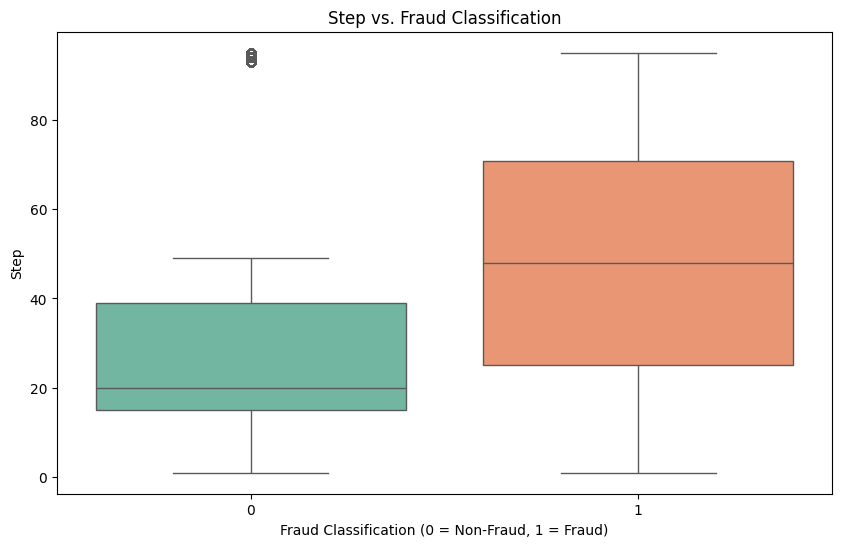

In [7]:
# Create a boxplot comparing 'step' by 'isFraud'
plt.figure(figsize=(10,6))  # Set figure size
sns.boxplot(x='isFraud', y='step', data=df, palette='Set2')

# Add titles and labels
plt.title('Step vs. Fraud Classification')
plt.xlabel('Fraud Classification (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Step')

# Show the plot
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to 'type' columns
df['type'] = label_encoder.fit_transform(df['type'])

df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1,0
3,1,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
1048570,95,1,132557.35,479803.00,347245.65,484329.37,616886.72,0,0
1048571,95,3,9917.36,90545.00,80627.64,0.00,0.00,0,0
1048572,95,3,14140.05,20545.00,6404.95,0.00,0.00,0,0
1048573,95,3,10020.05,90605.00,80584.95,0.00,0.00,0,0


In [9]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your dataset is loaded as 'df'

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# List of numerical columns to scale
numerical_columns = ['step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Apply Min-Max Scaling to the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0.0,3,0.000984,0.004374,0.004121,0.000000,0.000000,0,0
1,0.0,3,0.000186,0.000546,0.000498,0.000000,0.000000,0,0
2,0.0,4,0.000018,0.000005,0.000000,0.000000,0.000000,1,0
3,0.0,1,0.000018,0.000005,0.000000,0.000503,0.000000,1,0
4,0.0,3,0.001167,0.001068,0.000768,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...
1048570,1.0,1,0.013256,0.012334,0.008927,0.011504,0.014618,0,0
1048571,1.0,3,0.000992,0.002328,0.002073,0.000000,0.000000,0,0
1048572,1.0,3,0.001414,0.000528,0.000165,0.000000,0.000000,0,0
1048573,1.0,3,0.001002,0.002329,0.002072,0.000000,0.000000,0,0


<ipython-input-10-7748ecc221c6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFraud', data=df, palette='Set2')


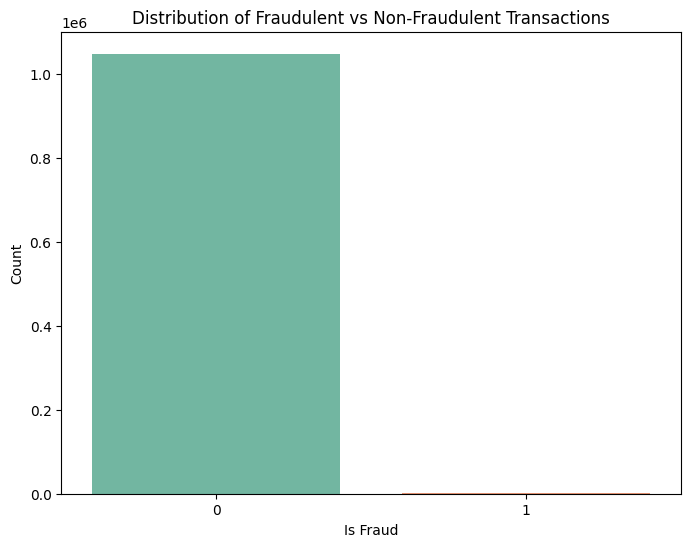

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable 'isFraud'
plt.figure(figsize=(8, 6))
sns.countplot(x='isFraud', data=df, palette='Set2')

# Add titles and labels
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')

# Show the plot
plt.show()


In [11]:

from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'isFraud' is the target column
# data.drop(columns=['isFraud', 'isFlaggedFraud'])
X = df.drop(columns=['isFraud', 'isFlaggedFraud'])  # Features
y = df['isFraud']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_res, y_res = smote_tomek.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE-Tomek
print("Class distribution after SMOTE-Tomek:")
print(pd.Series(y_res).value_counts())


Class distribution after SMOTE-Tomek:
isFraud
0    837895
1    837895
Name: count, dtype: int64


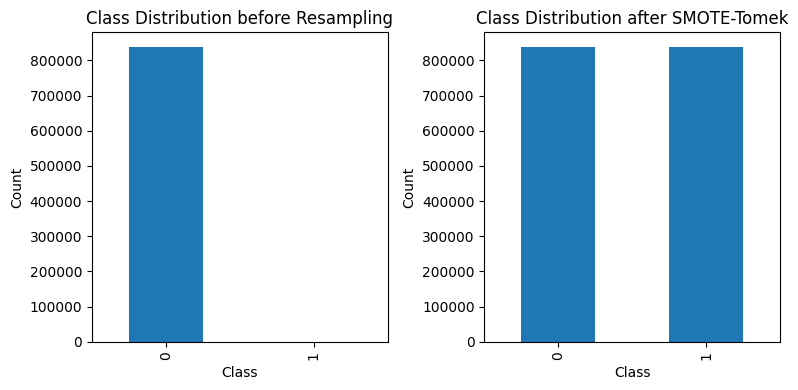

In [12]:
# Plot before resampling
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', title='Class Distribution before Resampling')
plt.xlabel('Class')
plt.ylabel('Count')

# Plot after SMOTE-Tomek
plt.subplot(1, 2, 2)
pd.Series(y_res).value_counts().plot(kind='bar', title='Class Distribution after SMOTE-Tomek')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [13]:
print(f"Number of samples in the resampled training set (after SMOTE-Tomek): {X_res.shape[0]}")
print(f"Number of samples in the resampled training set (after SMOTE-Tomek): {X_test.shape[0]}")

Number of samples in the resampled training set (after SMOTE-Tomek): 1675790
Number of samples in the resampled training set (after SMOTE-Tomek): 209715


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed
knn.fit(X_res, y_res)  # Train the KNN model on the resampled data
knn_train_accuracy = knn.score(X_res, y_res)  # Training accuracy
knn_test_accuracy = knn.score(X_test, y_test)  # Test accuracy
print("KNN Training Accuracy:", knn_train_accuracy)
print("KNN Testing Accuracy:", knn_test_accuracy)

# Decision Tree Model
dt = DecisionTreeClassifier(random_state=42,max_depth=50,min_samples_split=8)  # You can tune parameters like max_depth, min_samples_split
dt.fit(X_res, y_res)  # Train the Decision Tree model on the resampled data
dt_train_accuracy = dt.score(X_res, y_res)  # Training accuracy
dt_test_accuracy = dt.score(X_test, y_test)  # Test accuracy
print("Decision Tree Training Accuracy:", dt_train_accuracy)
print("Decision Tree Testing Accuracy:", dt_test_accuracy)

# Random Forest Model
rf = RandomForestClassifier(random_state=42,max_depth=50,min_samples_split=8)  # You can tune parameters like n_estimators, max_depth
rf.fit(X_res, y_res)  # Train the Random Forest model on the resampled data
rf_train_accuracy = rf.score(X_res, y_res)  # Training accuracy
rf_test_accuracy = rf.score(X_test, y_test)  # Test accuracy
print("Random Forest Training Accuracy:", rf_train_accuracy)
print("Random Forest Testing Accuracy:", rf_test_accuracy)

ensemble_model = VotingClassifier(estimators=[
    ('knn', knn),
    ('dt', dt),
    ('rf', rf)
], voting='soft')

# Train the ensemble model on the resampled data
ensemble_model.fit(X_res, y_res)

# Training Accuracy
ensemble_train_accuracy = ensemble_model.score(X_res, y_res)

# Test Accuracy
ensemble_test_accuracy = ensemble_model.score(X_test, y_test)

# Print the training and test accuracy for the ensemble model
print("Ensemble Model Training Accuracy:", ensemble_train_accuracy)
print("Ensemble Model Testing Accuracy:", ensemble_test_accuracy)

KNN Training Accuracy: 0.9985851449167259
KNN Testing Accuracy: 0.9958705862718451
Decision Tree Training Accuracy: 0.9998824435042577
Decision Tree Testing Accuracy: 0.9982500059604702
Random Forest Training Accuracy: 0.9999922424647479
Random Forest Testing Accuracy: 0.9990272512695801
Ensemble Model Training Accuracy: 0.999984484929496
Ensemble Model Testing Accuracy: 0.9991846076818539


In [15]:
# 1. Evaluate individual models (RF, DT, KNN) with the best parameters found by GridSearchCV
# Evaluate Random Forest
from sklearn.metrics import precision_score, recall_score, f1_score
rf_pred = rf.predict(X_test)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

# Evaluate Decision Tree
dt_pred = dt.predict(X_test)
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_pred, average='weighted')

# Evaluate K-Nearest Neighbors
knn_pred = knn.predict(X_test)
knn_precision = precision_score(y_test, knn_pred, average='weighted')
knn_recall = recall_score(y_test, knn_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_pred, average='weighted')

# 2. Print the evaluation metrics for individual models
print("Random Forest Evaluation:")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")

print("\nDecision Tree Evaluation:")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")

print("\nK-Nearest Neighbors Evaluation:")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1-Score: {knn_f1:.4f}")

y_pred_test = ensemble_model.predict(X_test)
ensemble_test_precision = precision_score(y_test, y_pred_test, average='weighted')
ensemble_test_recall = recall_score(y_test, y_pred_test, average='weighted')
ensemble_test_f1 = f1_score(y_test, y_pred_test, average='weighted')

print("\nEnsemble Model Testing Precision:", ensemble_test_precision)
print("Ensemble Model Testing Recall:", ensemble_test_recall)
print("Ensemble Model Testing F1-Score:", ensemble_test_f1)

Random Forest Evaluation:
Precision: 0.9994
Recall: 0.9990
F1-Score: 0.9992

Decision Tree Evaluation:
Precision: 0.9992
Recall: 0.9983
F1-Score: 0.9986

K-Nearest Neighbors Evaluation:
Precision: 0.9989
Recall: 0.9959
F1-Score: 0.9972

Ensemble Model Testing Precision: 0.9994201298753078
Ensemble Model Testing Recall: 0.9991846076818539
Ensemble Model Testing F1-Score: 0.9992689193779082


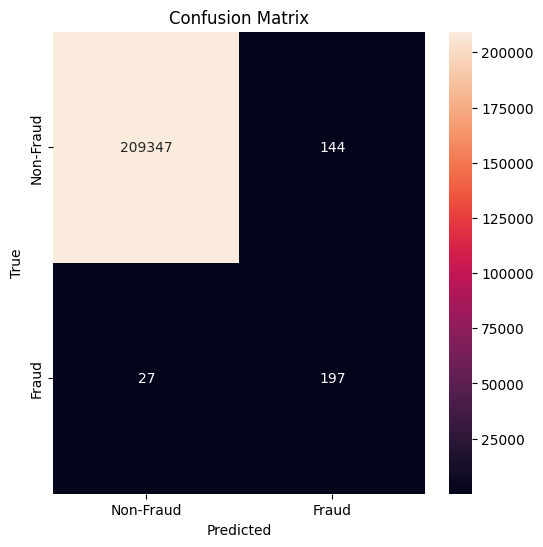

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained your ensemble model
# For example, ensemble_model is the trained VotingClassifier

# Make predictions on the test data
y_pred = ensemble_model.predict(X_test)  # X_test is your test set

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)  # y_test is the true labels for the test set

# Visualize the confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

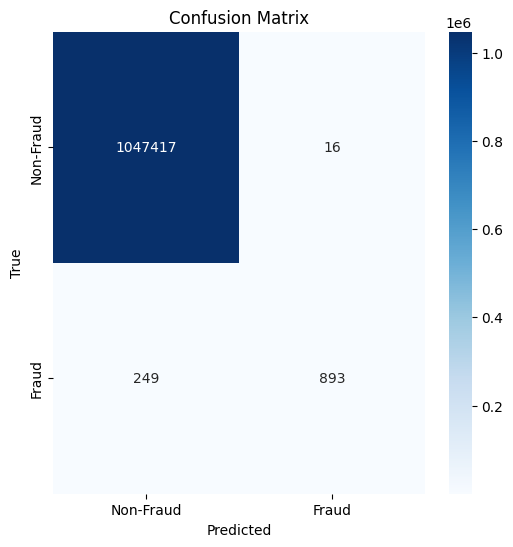

Accuracies for each fold: [0.99976635 0.99975204 0.99975681 0.99975204 0.99970913]
Precisions for each fold: [0.99975979 0.99975071 0.9997542  0.99974874 0.99970624]
Recalls for each fold: [0.99976635 0.99975204 0.99975681 0.99975204 0.99970913]
F1 scores for each fold: [0.99975707 0.99973625 0.99974191 0.99973904 0.99968955]
Accuracies for each fold: [0.99992013 0.99992847 0.99993324 0.99993443 0.9999404 ]
Precisions for each fold: [0.99992014 0.99992848 0.99993325 0.99993444 0.9999404 ]
Recalls for each fold: [0.99992013 0.99992847 0.99993324 0.99993443 0.9999404 ]
F1 scores for each fold: [0.99991862 0.99992727 0.9999322  0.9999334  0.99993955]


In [17]:
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate,cross_val_predict
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score,average='weighted'),
    'recall': make_scorer(recall_score,average='weighted'),
    'f1': make_scorer(f1_score,average='weighted')
}

scores = cross_validate(ensemble_model, X, y, cv=kf, scoring=scoring,return_train_score=True)
y_pred = cross_val_predict(ensemble_model, X, y, cv=kf)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("Accuracies for each fold:", scores['test_accuracy'])
print("Precisions for each fold:", scores['test_precision'])
print("Recalls for each fold:", scores['test_recall'])
print("F1 scores for each fold:", scores['test_f1'])

print("Accuracies for each fold:", scores['train_accuracy'])
print("Precisions for each fold:", scores['train_precision'])
print("Recalls for each fold:", scores['train_recall'])
print("F1 scores for each fold:", scores['train_f1'])

In [ ]:
# Split the dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Hyperparameter tuning using GridSearchCV
# param_grid_rf = {'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10, 15, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]}

# param_grid_dt = {'max_depth': [5, 10, 15, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'criterion': ['gini', 'entropy']}
# param_grid_knn = {'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'leaf_size': [20, 30, 40],
#     'p': [1, 2]}

# # Create the classifiers
# rf1 = RandomForestClassifier()
# dt1 = DecisionTreeClassifier()
# knn1 = KNeighborsClassifier()

In [ ]:
# Apply GridSearchCV
# grid_search_rf = GridSearchCV(estimator=rf1, param_grid=param_grid_rf, cv=5)
# grid_search_dt = GridSearchCV(estimator=dt1, param_grid=param_grid_dt, cv=5)
# grid_search_knn = GridSearchCV(estimator=knn1, param_grid=param_grid_knn, cv=5)

# # Fit GridSearchCV to find best hyperparameters
# grid_search_rf.fit(X_res, y_res)
# grid_search_dt.fit(X_res, y_res)
# grid_search_knn.fit(X_res, y_res)

# # Best parameters
# print("Best parameters for RF:", grid_search_rf.best_params_)
# print("Best parameters for DT:", grid_search_dt.best_params_)
# print("Best parameters for KNN:", grid_search_knn.best_params_)

# print(grid_search_rf.score(X_res, y_res),
# grid_search_dt.score(X_res, y_res),
# grid_search_knn.score(X_res, y_res))

In [ ]:
# print(grid_search_rf.score(X_test, y_test),
# grid_search_dt.score(X_test, y_test),
# grid_search_knn.score(X_test, y_test))

In [ ]:
# 2. Hyperparameter tuning using PSO (for RandomForest only as an example)
# def objective_function(params):
#     n_estimators, max_depth = params
#     rf = RandomForestClassifier(n_estimators=int(n_estimators), max_depth=int(max_depth))
#     rf.fit(X_train, y_train)
#     return -rf.score(X_test, y_test)  # Negative because PSO minimizes the function

# # PSO optimization for Random Forest
# lb = [50, 5]  # Lower bounds for n_estimators, max_depth
# ub = [500, 50]  # Upper bounds for n_estimators, max_depth
# best_params_rf, best_score = pso(objective_function, lb, ub, swarmsize=10, maxiter=5)
# print(f"Best RF parameters found by PSO: n_estimators={int(best_params_rf[0])}, max_depth={int(best_params_rf[1])}")

# 3. Train the models with the best parameters found by GridSearchCV and PSO
# rf_best = RandomForestClassifier(n_estimators=grid_search_rf.best_params_['n_estimators'],
#                                  max_depth=grid_search_rf.best_params_['max_depth'])
# rf_best.fit(X_res, y_res)

# dt_best = DecisionTreeClassifier(max_depth=grid_search_dt.best_params_['max_depth'],
#                                  min_samples_split=grid_search_dt.best_params_['min_samples_split'])
# dt_best.fit(X_res, y_res)

# knn_best = KNeighborsClassifier(n_neighbors=grid_search_knn.best_params_['n_neighbors'],
#                                 weights=grid_search_knn.best_params_['weights'])
# knn_best.fit(X_res, y_res)

# rf_best = RandomForestClassifier(n_estimators=grid_search_rf.best_params_,
#                                  max_depth=grid_search_rf.best_params_)
# rf_best.fit(X_res, y_res)
# rf_train_accuracy1 = rf_best.score(X_res, y_res)  # Training accuracy
# rf_test_accuracy1 = rf_best.score(X_test, y_test)  # Test accuracy
# print("RF Training Accuracy:", rf_train_accuracy1)
# print("RF Testing Accuracy:", rf_test_accuracy1)


# dt_best = DecisionTreeClassifier(max_depth=grid_search_dt.best_params_,
#                                  min_samples_split=grid_search_dt.best_params_)
# dt_best.fit(X_res, y_res)
# dt_train_accuracy1 = dt_best.score(X_res, y_res)  # Training accuracy
# dt_test_accuracy1 = dt_best.score(X_test, y_test)  # Test accuracy
# print("DT Training Accuracy:", dt_train_accuracy1)
# print("DT Testing Accuracy:", dt_test_accuracy1)


# knn_best = KNeighborsClassifier(n_neighbors=grid_search_knn.best_params_,
#                                 weights=grid_search_knn.best_params_)
# knn_best.fit(X_res, y_res)
# knn_train_accuracy1 = knn_best.score(X_res, y_res)  # Training accuracy
# knn_test_accuracy1 = knn_best.score(X_test, y_test)  # Test accuracy
# print("KNN Training Accuracy:", knn_train_accuracy1)
# print("KNN Testing Accuracy:", knn_test_accuracy1)

# # 4. Ensemble the models using Voting Classifier
# voting_clf = VotingClassifier(estimators=[
#     ('rf', rf_best),
#     ('dt', dt_best),
#     ('knn', knn_best)
# ], voting='soft')  # 'hard' voting means majority voting (for classification)

# # Train the Voting Classifier
# voting_clf.fit(X_train, y_train)

# # 5. Evaluate the ensemble model
# y_pred = voting_clf.predict(X_test)
# print("Ensemble model accuracy:", accuracy_score(y_test, y_pred))

In [18]:
pip install lime shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=5a5db38878983e0c6b5fed4d79387b9582d17594cf1393a86050f0bc6741d14d
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [19]:
import shap


# Reduce the background data size to a smaller number of representative samples
# background_data = shap.sample(X_res,10)  # Use 1000 random samples from the training data
x_test_subset = X_test.sample(n=100, random_state=42)
# Use the smaller background data for SHAP explanation
# explainer_shap = shap.KernelExplainer(ensemble_model.predict_proba, background_data)

ens_explainer = shap.KernelExplainer(ensemble_model.predict_proba, x_test_subset)
shap_values_ens = ens_explainer.shap_values(x_test_subset)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib

In [20]:
shap_values_ens

array([[[ 0.00234395, -0.00234395],
        [ 0.0111087 , -0.0111087 ],
        [-0.01009026,  0.01009026],
        ...,
        [-0.01612225,  0.01612225],
        [-0.00724696,  0.00724696],
        [ 0.00708439, -0.00708439]],

       [[ 0.00747454, -0.00747454],
        [-0.01526155,  0.01526155],
        [ 0.02713948, -0.02713948],
        ...,
        [-0.02679936,  0.02679936],
        [-0.00377478,  0.00377478],
        [-0.00081634,  0.00081634]],

       [[ 0.00219638, -0.00219638],
        [ 0.0008114 , -0.0008114 ],
        [-0.00373765,  0.00373765],
        ...,
        [ 0.05138563, -0.05138563],
        [ 0.00653451, -0.00653451],
        [-0.00135746,  0.00135746]],

       ...,

       [[ 0.00285229, -0.00285229],
        [ 0.00822475, -0.00822475],
        [-0.0078728 ,  0.0078728 ],
        ...,
        [-0.01697523,  0.01697523],
        [-0.00635367,  0.00635367],
        [ 0.00726797, -0.00726797]],

       [[ 0.00428092, -0.00428092],
        [ 0.00941461, -0.00

In [ ]:
# Assuming shap_values_ens holds the SHAP values for the ensemble model
# Extract the SHAP values for the specific instance (e.g., sample index 42)
sample_index = 42  # Choose the sample index you want to explain

# SHAP values for class 1 (fraudulent class)
shap_values_single = shap_values_ens[sample_index]  # Adjust if the data structure is different


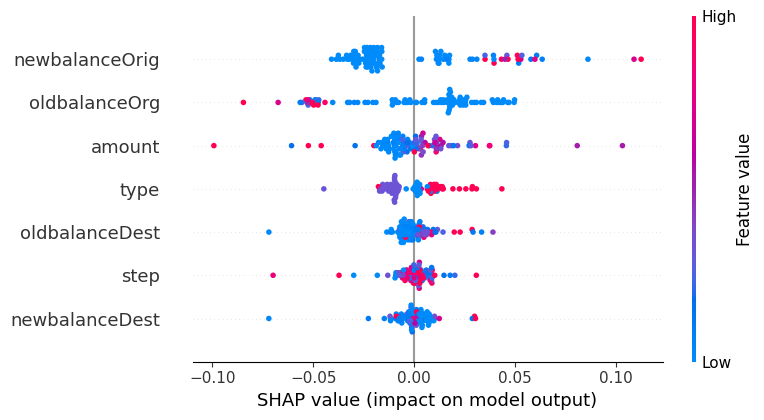

In [21]:
shap.summary_plot(shap_values_ens[:,:,0], x_test_subset)

In [22]:
print(f"Shape of SHAP values: {shap_values_ens.shape}")
print(f"Shape of X_test: {x_test_subset.shape}")


Shape of SHAP values: (100, 7, 2)
Shape of X_test: (100, 7)


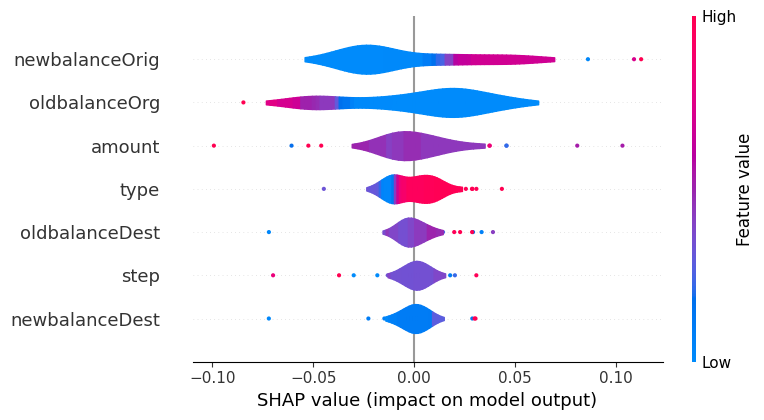

In [23]:
shap.summary_plot(shap_values_ens[:,:,0], x_test_subset, plot_type="violin")

In [24]:
x_test_subset.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest'],
      dtype='object')

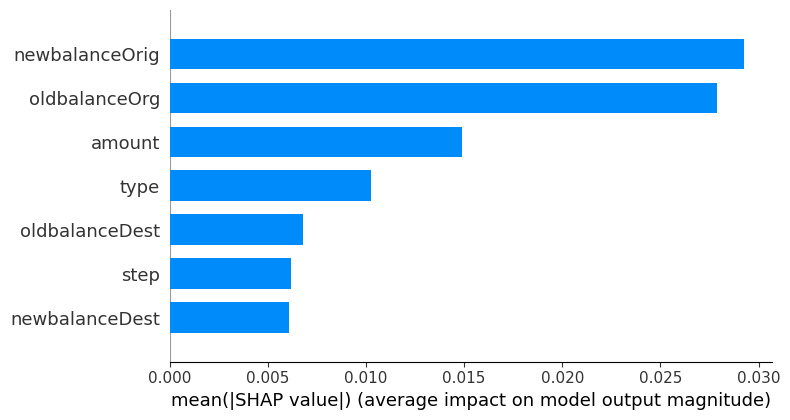

In [25]:
# Plot the summary plot for Class 0 (non-fraud)
shap.summary_plot(shap_values_ens[:,:,0],x_test_subset, plot_type="bar")


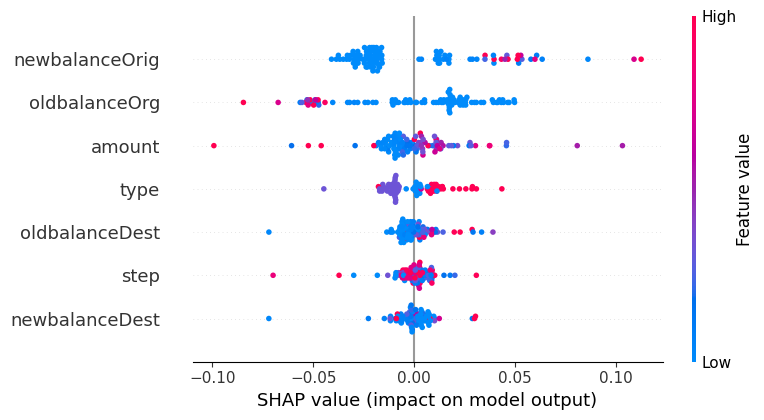

In [26]:
shap.summary_plot(shap_values_ens[:,:,0], x_test_subset)